In [118]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

In [131]:
img_paths = np.load("./dataset/img_paths_with_supervisely.npy")

In [147]:
mask_path = np.random.choice(img_paths)
mask_ID = mask_path.split(".p")[0] + "_matte.png"
if 'Supervisely' in mask_ID:
    mask_ID = mask_ID.replace("/img/", "/masks_machine/")
    mask_ID = mask_ID.replace(".jpeg", "")


In [148]:
# mask = cv2.imread("./dataset/selfie/training/00694_matte.png", cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(mask_ID, cv2.IMREAD_GRAYSCALE)
if "Supervisely" in mask_path:
    mask = mask * 255
mask = cv2.resize(mask, (256,256))
edge = cv2.Canny(mask, 0, 30)
k = np.int((mask[mask > 50].shape[0] / (mask.shape[0] * mask.shape[1])) * 50)

if k < 2:
    k = 2
ksize = (k, k)

kernel = cv2.getStructuringElement(2, ksize)
dil = cv2.dilate(edge, kernel)

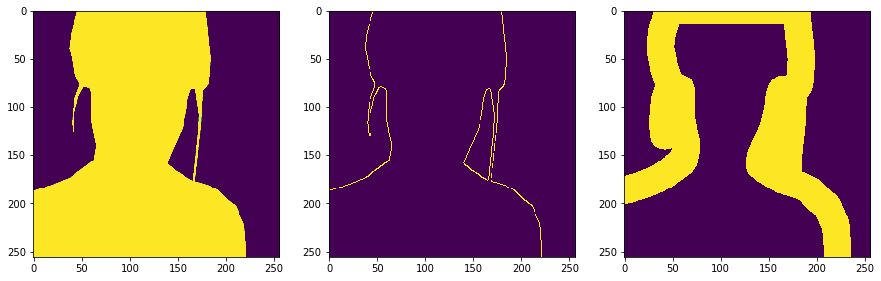

In [149]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(mask)
plt.subplot(132)
plt.imshow(edge)
plt.subplot(133)
plt.imshow(dil)
plt.show()

In [3]:
mask[mask > 200].shape

(37877,)

In [4]:
(mask[mask > 100].shape[0] / (mask.shape[0] * mask.shape[1])) * 50

29.8675537109375

In [5]:
k = np.int((mask[mask > 100].shape[0] / (mask.shape[0] * mask.shape[1])) * 50)

In [67]:
k

29

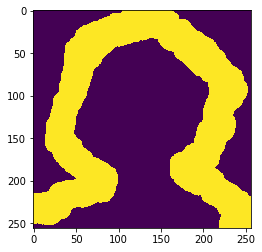

In [52]:
k = np.int(mask[mask > 50].shape[0] / (mask.shape[0] * mask.shape[1]) * 50)

ksize = (k, k)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize)

dil = cv2.dilate(edge, kernel)

plt.imshow(dil)